In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sqlite3
sns.set()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


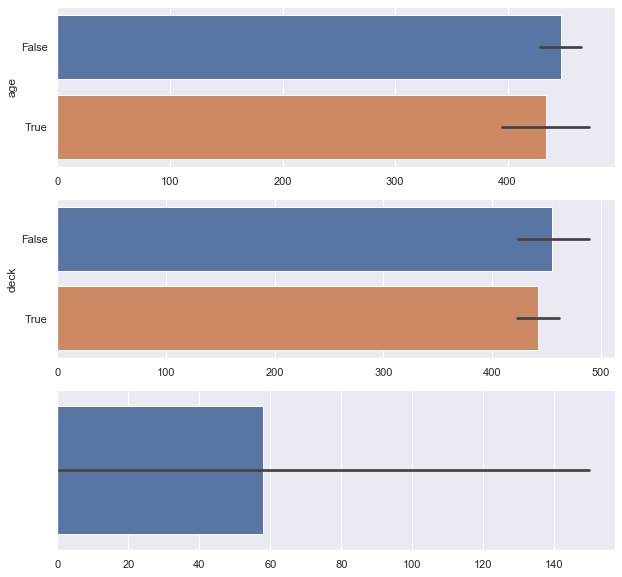

In [2]:
df = sns.load_dataset("titanic")
df.info()
#using info we can see age and deck are missing a lot of values
data = pd.isnull(df["age"])
data2 = pd.isnull(df["deck"])
data3 = df.isnull().sum()

#these are the plots for missing data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(311)
sns.barplot(x=list(range(0, 891)),y=data,orient="h", ax=ax)
ax2 = fig.add_subplot(312)
sns.barplot(x=list(range(0, 891)),y=data2,orient="h",ax=ax2)
ax3 = fig.add_subplot(313)
sns.barplot(data3)

Text(0.5, 1.0, 'Older Adult')

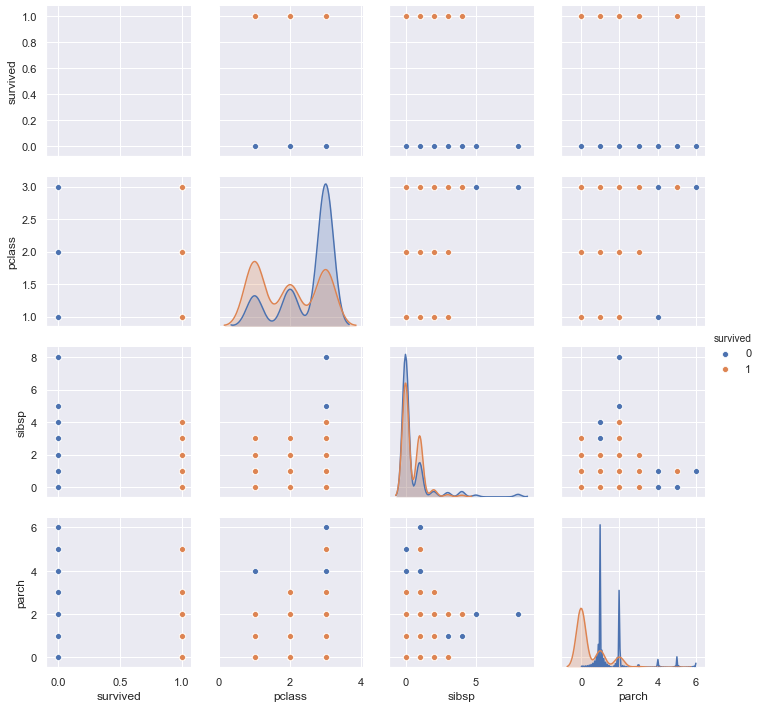

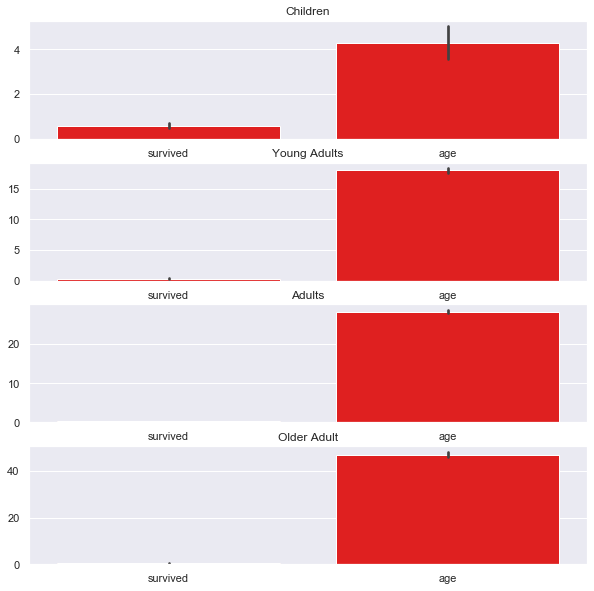

In [6]:
df2 = df[["survived","pclass","sibsp","parch"]]
#getting all of the integer columns
sns.pairplot(df2, hue="survived", kind="scatter")

#creating conditions for age ranges as well as not null
df3 = df[df['age'].notnull() & (df['age'] <= 10)]
df4 = df[df['age'].notnull() & (df['age'] > 10 ) & (df['age'] <= 21)]
df5 = df[df['age'].notnull() & (df['age'] > 21 ) & (df['age'] <= 35)]
df6 = df[df['age'].notnull() & (df['age'] > 35 )]

df7 = df3[["survived","age"]]
df8 = df4[["survived","age"]]
df9 = df5[["survived","age"]]
df10 = df6[["survived","age"]]

#plotting these in one figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(411)
sns.barplot(data=df7,color='red',orient="v",ax=ax)
plt.title('Children')
ax2 = fig.add_subplot(412)
sns.barplot(data=df8,color='red',orient="v",ax=ax2)
plt.title('Young Adults')
ax3 = fig.add_subplot(413)
sns.barplot(data=df9,color='red',orient="v",ax=ax3)
plt.title('Adults')
ax4 = fig.add_subplot(414)
sns.barplot(data=df10,color='red',orient="v",ax=ax4)
plt.title('Older Adult')